Informações do atributo:

1. Data: (DD/MM/AAAA) Dia, mês ('junho' a 'setembro'), ano (2012)
Observações de dados meteorológicos
2. Temp: temperatura do meio-dia (temperatura máxima) em graus Celsius: 22 a 42
3. UR: Umidade Relativa em %: 21 a 90
4. Ws :Velocidade do vento em km/h: 6 a 29
5. Chuva: dia total em mm: 0 a 16,8
Componentes FWI
6. Índice de Código de Umidade de Combustível Fino (FFMC) do sistema FWI: 28,6 a 92,5
7. Índice Duff Moisture Code (DMC) do sistema FWI: 1,1 a 65,9
8. Índice de código de seca (DC) do sistema FWI: 7 a 220,4
9. Índice de Spread Inicial (ISI) do sistema FWI: 0 a 18,5
10. Índice de Buildup Index (BUI) do sistema FWI: 1,1 a 68
11. Índice de clima de incêndio (FWI): 0 a 31,1

In [2]:

import pandas as pd
import seaborn as sb
import sklearn as skl
import imblearn as imbl
from matplotlib import pyplot as plt

In [3]:
algerian_forest_data = pandas.read_csv('Algerian_forest_fires_dataset_UPDATE.csv')

algerian_forest_data.head()

NameError: name 'pandas' is not defined

In [ ]:
import pandas
algerian_forest_data = pandas.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', na_values=['NA'])


In [ ]:
algerian_forest_data.shape

(244, 15)

In [ ]:
algerian_forest_data.describe()

day       month    year  Temperature          RH          Ws  \
count  244.000000  244.000000   244.0   244.000000  244.000000  244.000000   
mean    15.754098    7.500000  2012.0    32.172131   61.938525   15.504098   
std      8.825059    1.112961     0.0     3.633843   14.884200    2.810178   
min      1.000000    6.000000  2012.0    22.000000   21.000000    6.000000   
25%      8.000000    7.000000  2012.0    30.000000   52.000000   14.000000   
50%     16.000000    7.500000  2012.0    32.000000   63.000000   15.000000   
75%     23.000000    8.000000  2012.0    35.000000   73.250000   17.000000   
max     31.000000    9.000000  2012.0    42.000000   90.000000   29.000000   

             Rain        FFMC         DMC          DC         ISI         BUI  \
count  244.000000  244.000000  244.000000  244.000000  244.000000  244.000000   
mean     0.760656   77.887705   14.673361   49.288115    4.759836   16.673361   
std      1.999406   14.337571   12.368039   47.619662    4.154628   14.201648   
min      0.000000   28.600000    0.700000    6.900000    0.000000    1.100000   
25%      0.000000   72.075000    5.800000   13.275000    1.400000    6.000000   
50%      0.000000   83.500000   11.300000   33.100000    3.500000   12.450000   
75%      0.500000   88.300000   20.750000   68.150000    7.300000   22.525000   
max     16.800000   96.000000   65.900000  220.400000   19.000000   68.000000   

              FWI  
count  244.000000  
mean     7.049180  
std      7.428366  
min      0.000000  
25%      0.700000  
50%      4.450000  
75%     11.375000  
max     31.100000

In [ ]:
print(algerian_forest_data.dtypes)


day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Region          object
Classes         object
dtype: object


In [ ]:
# Number of null values (for each column and total)

algerian_forest_data.isna().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Region         0
Classes        0
dtype: int64

Acho q vamos ter que dar drop de algumas colunas que nao são necessarias para o nosso dataset


In [ ]:
algerian_forest_data.describe()

day       month    year  Temperature          RH          Ws  \
count  244.000000  244.000000   244.0   244.000000  244.000000  244.000000   
mean    15.754098    7.500000  2012.0    32.172131   61.938525   15.504098   
std      8.825059    1.112961     0.0     3.633843   14.884200    2.810178   
min      1.000000    6.000000  2012.0    22.000000   21.000000    6.000000   
25%      8.000000    7.000000  2012.0    30.000000   52.000000   14.000000   
50%     16.000000    7.500000  2012.0    32.000000   63.000000   15.000000   
75%     23.000000    8.000000  2012.0    35.000000   73.250000   17.000000   
max     31.000000    9.000000  2012.0    42.000000   90.000000   29.000000   

             Rain        FFMC         DMC          DC         ISI         BUI  \
count  244.000000  244.000000  244.000000  244.000000  244.000000  244.000000   
mean     0.760656   77.887705   14.673361   49.288115    4.759836   16.673361   
std      1.999406   14.337571   12.368039   47.619662    4.154628   14.201648   
min      0.000000   28.600000    0.700000    6.900000    0.000000    1.100000   
25%      0.000000   72.075000    5.800000   13.275000    1.400000    6.000000   
50%      0.000000   83.500000   11.300000   33.100000    3.500000   12.450000   
75%      0.500000   88.300000   20.750000   68.150000    7.300000   22.525000   
max     16.800000   96.000000   65.900000  220.400000   19.000000   68.000000   

              FWI  
count  244.000000  
mean     7.049180  
std      7.428366  
min      0.000000  
25%      0.700000  
50%      4.450000  
75%     11.375000  
max     31.100000

In [ ]:
print(algerian_forest_data.columns)

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region', 'Classes'],
      dtype='object')


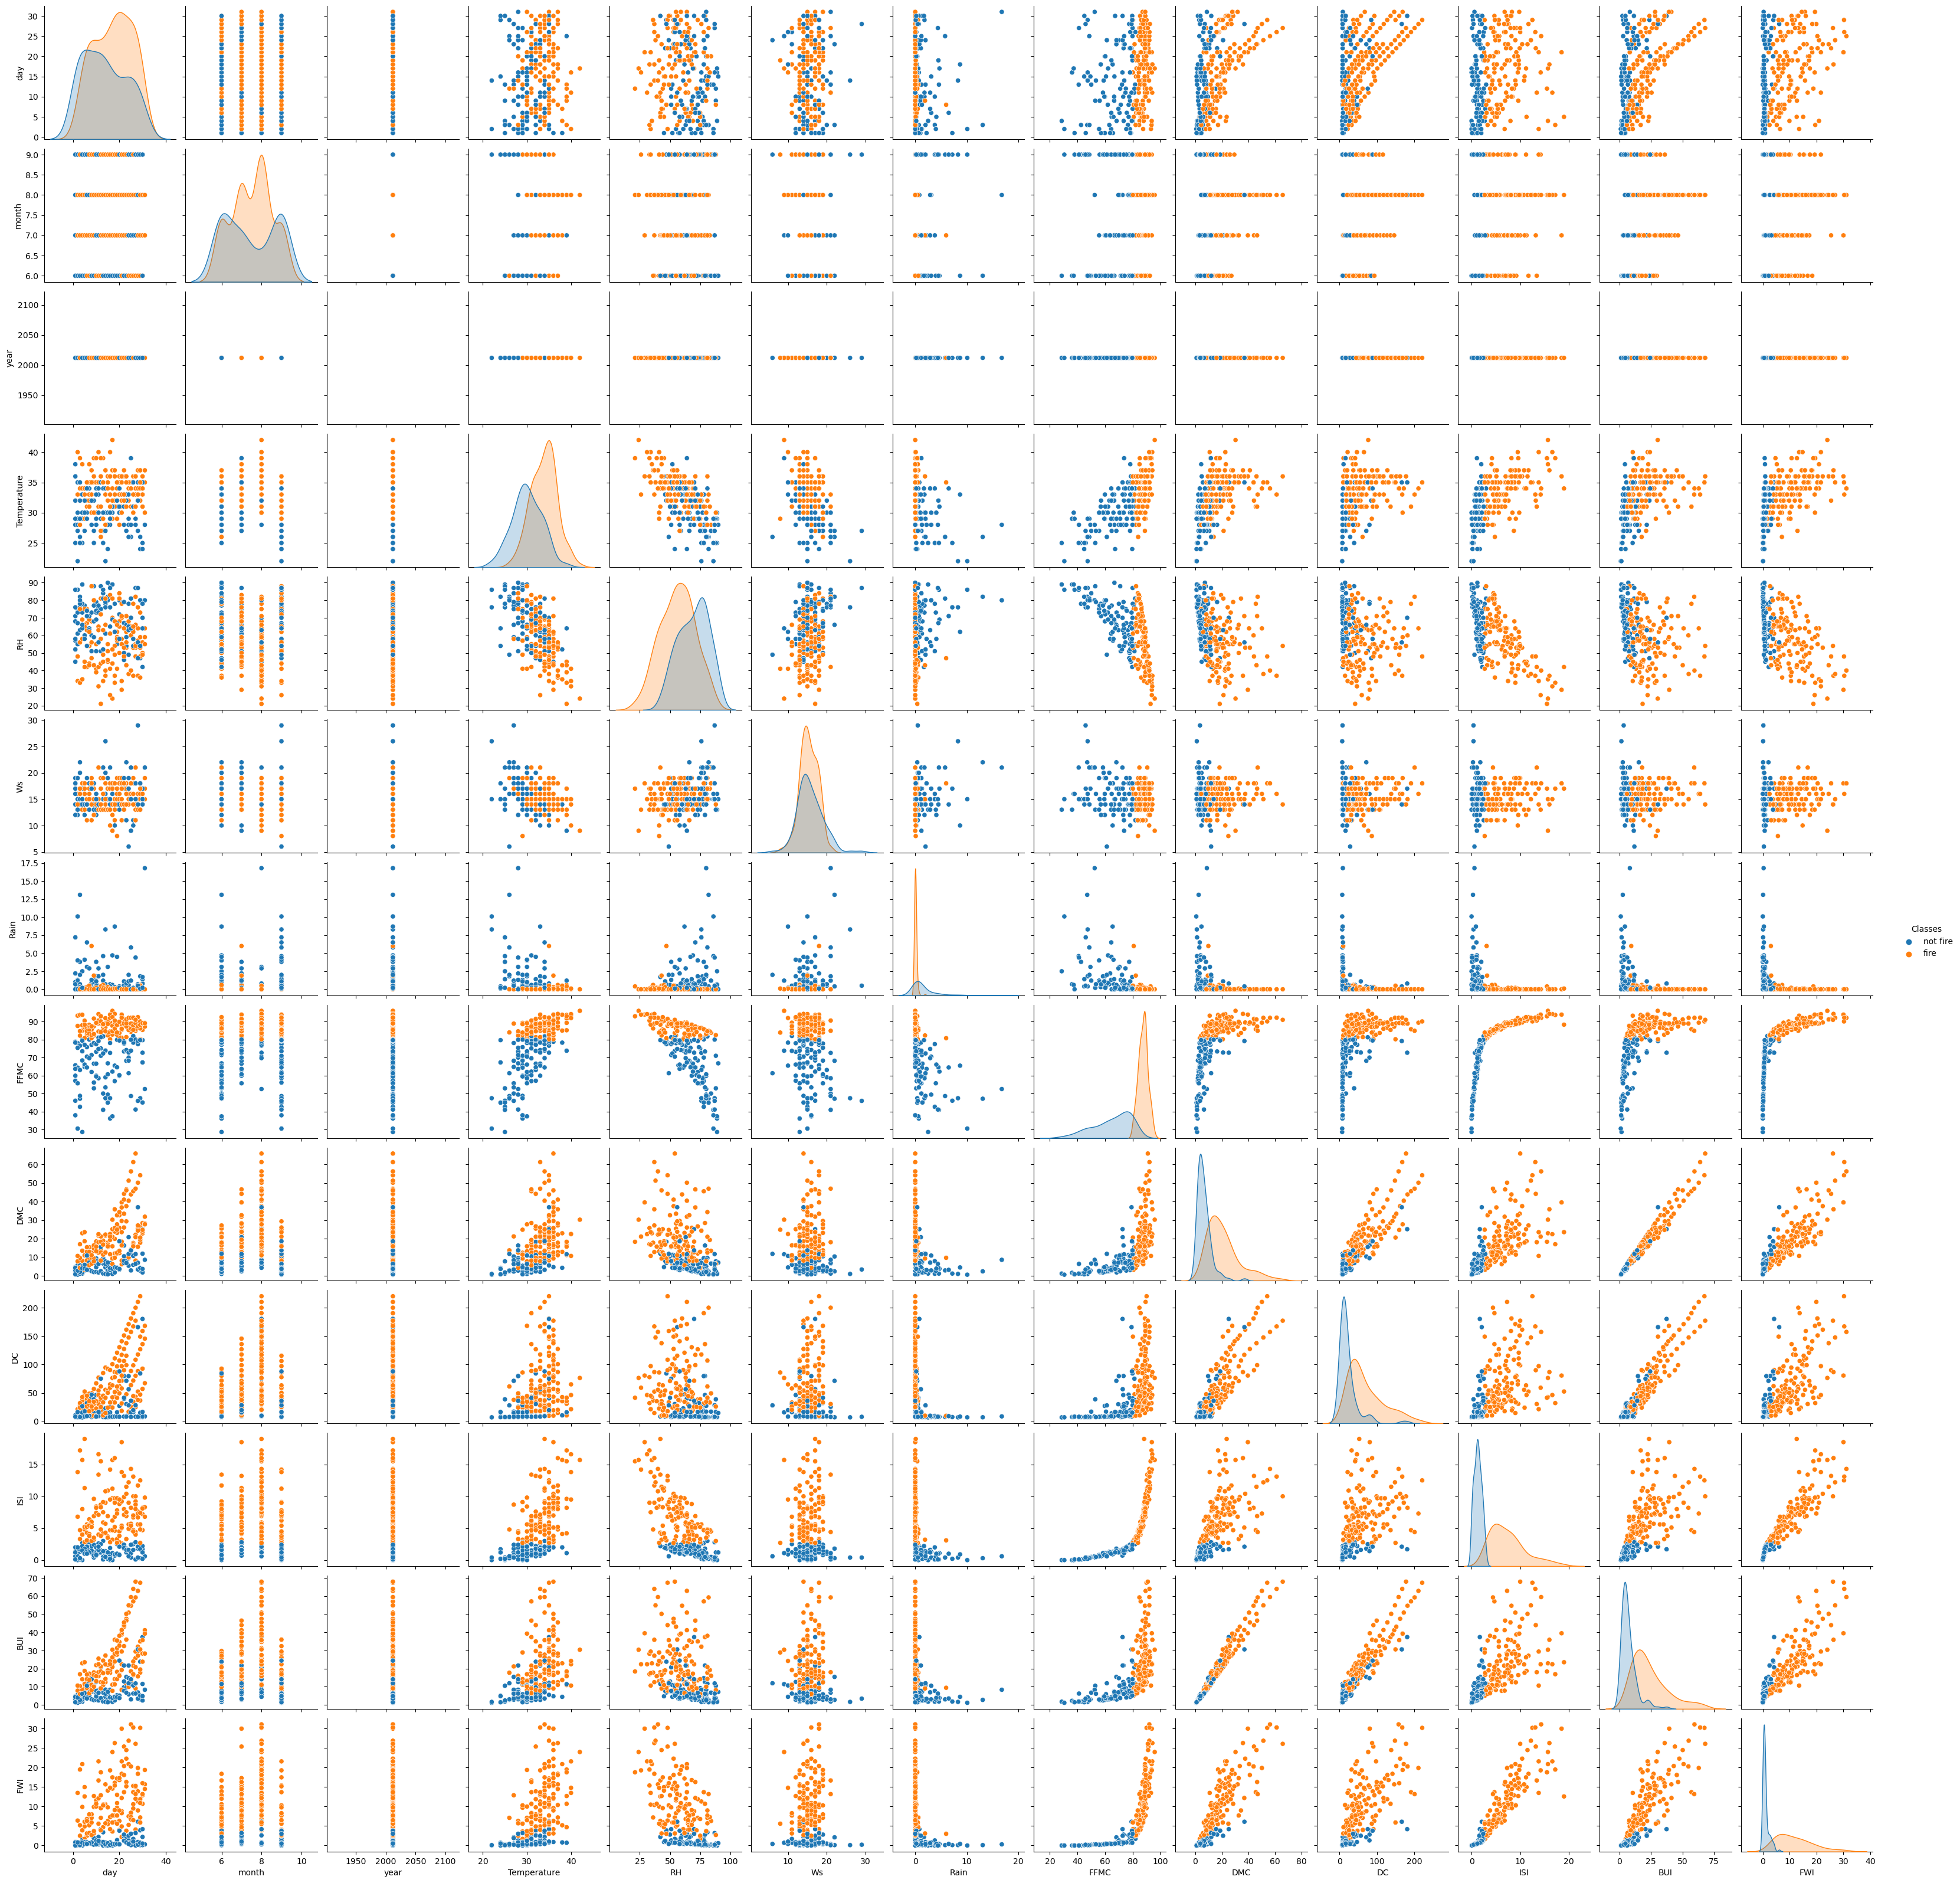

In [ ]:

# We have to temporarily drop the rows with 'NA' values # because the Seaborn plotting 
# function does not know what to do with them
sb.pairplot(algerian_forest_data, hue='Classes')

In [ ]:
print(algerian_forest_data['Classes'].unique())

['not fire' 'fire']


In [ ]:
print(algerian_forest_data['Region'].unique())

['Bejaia' 'Sidi-Bel Abbes']


In [ ]:
algerian_forest_data.loc[(algerian_forest_data['day'].isnull()) |
                         (algerian_forest_data['month'].isnull()) |
                         (algerian_forest_data['year'].isnull()) |
                         (algerian_forest_data['Temperature'].isnull()) |
                         (algerian_forest_data['RH'].isnull()) |
                         (algerian_forest_data['Ws'].isnull()) |
                         (algerian_forest_data['Rain'].isnull()) |
                         (algerian_forest_data['FFMC'].isnull()) |
                         (algerian_forest_data['DMC'].isnull()) |
                         (algerian_forest_data['DC'].isnull()) |
                         (algerian_forest_data['ISI'].isnull()) |
                         (algerian_forest_data['BUI'].isnull()) |
                         (algerian_forest_data['FWI'].isnull())]

Empty DataFrame
Columns: [day, month, year, Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Region, Classes]
Index: []

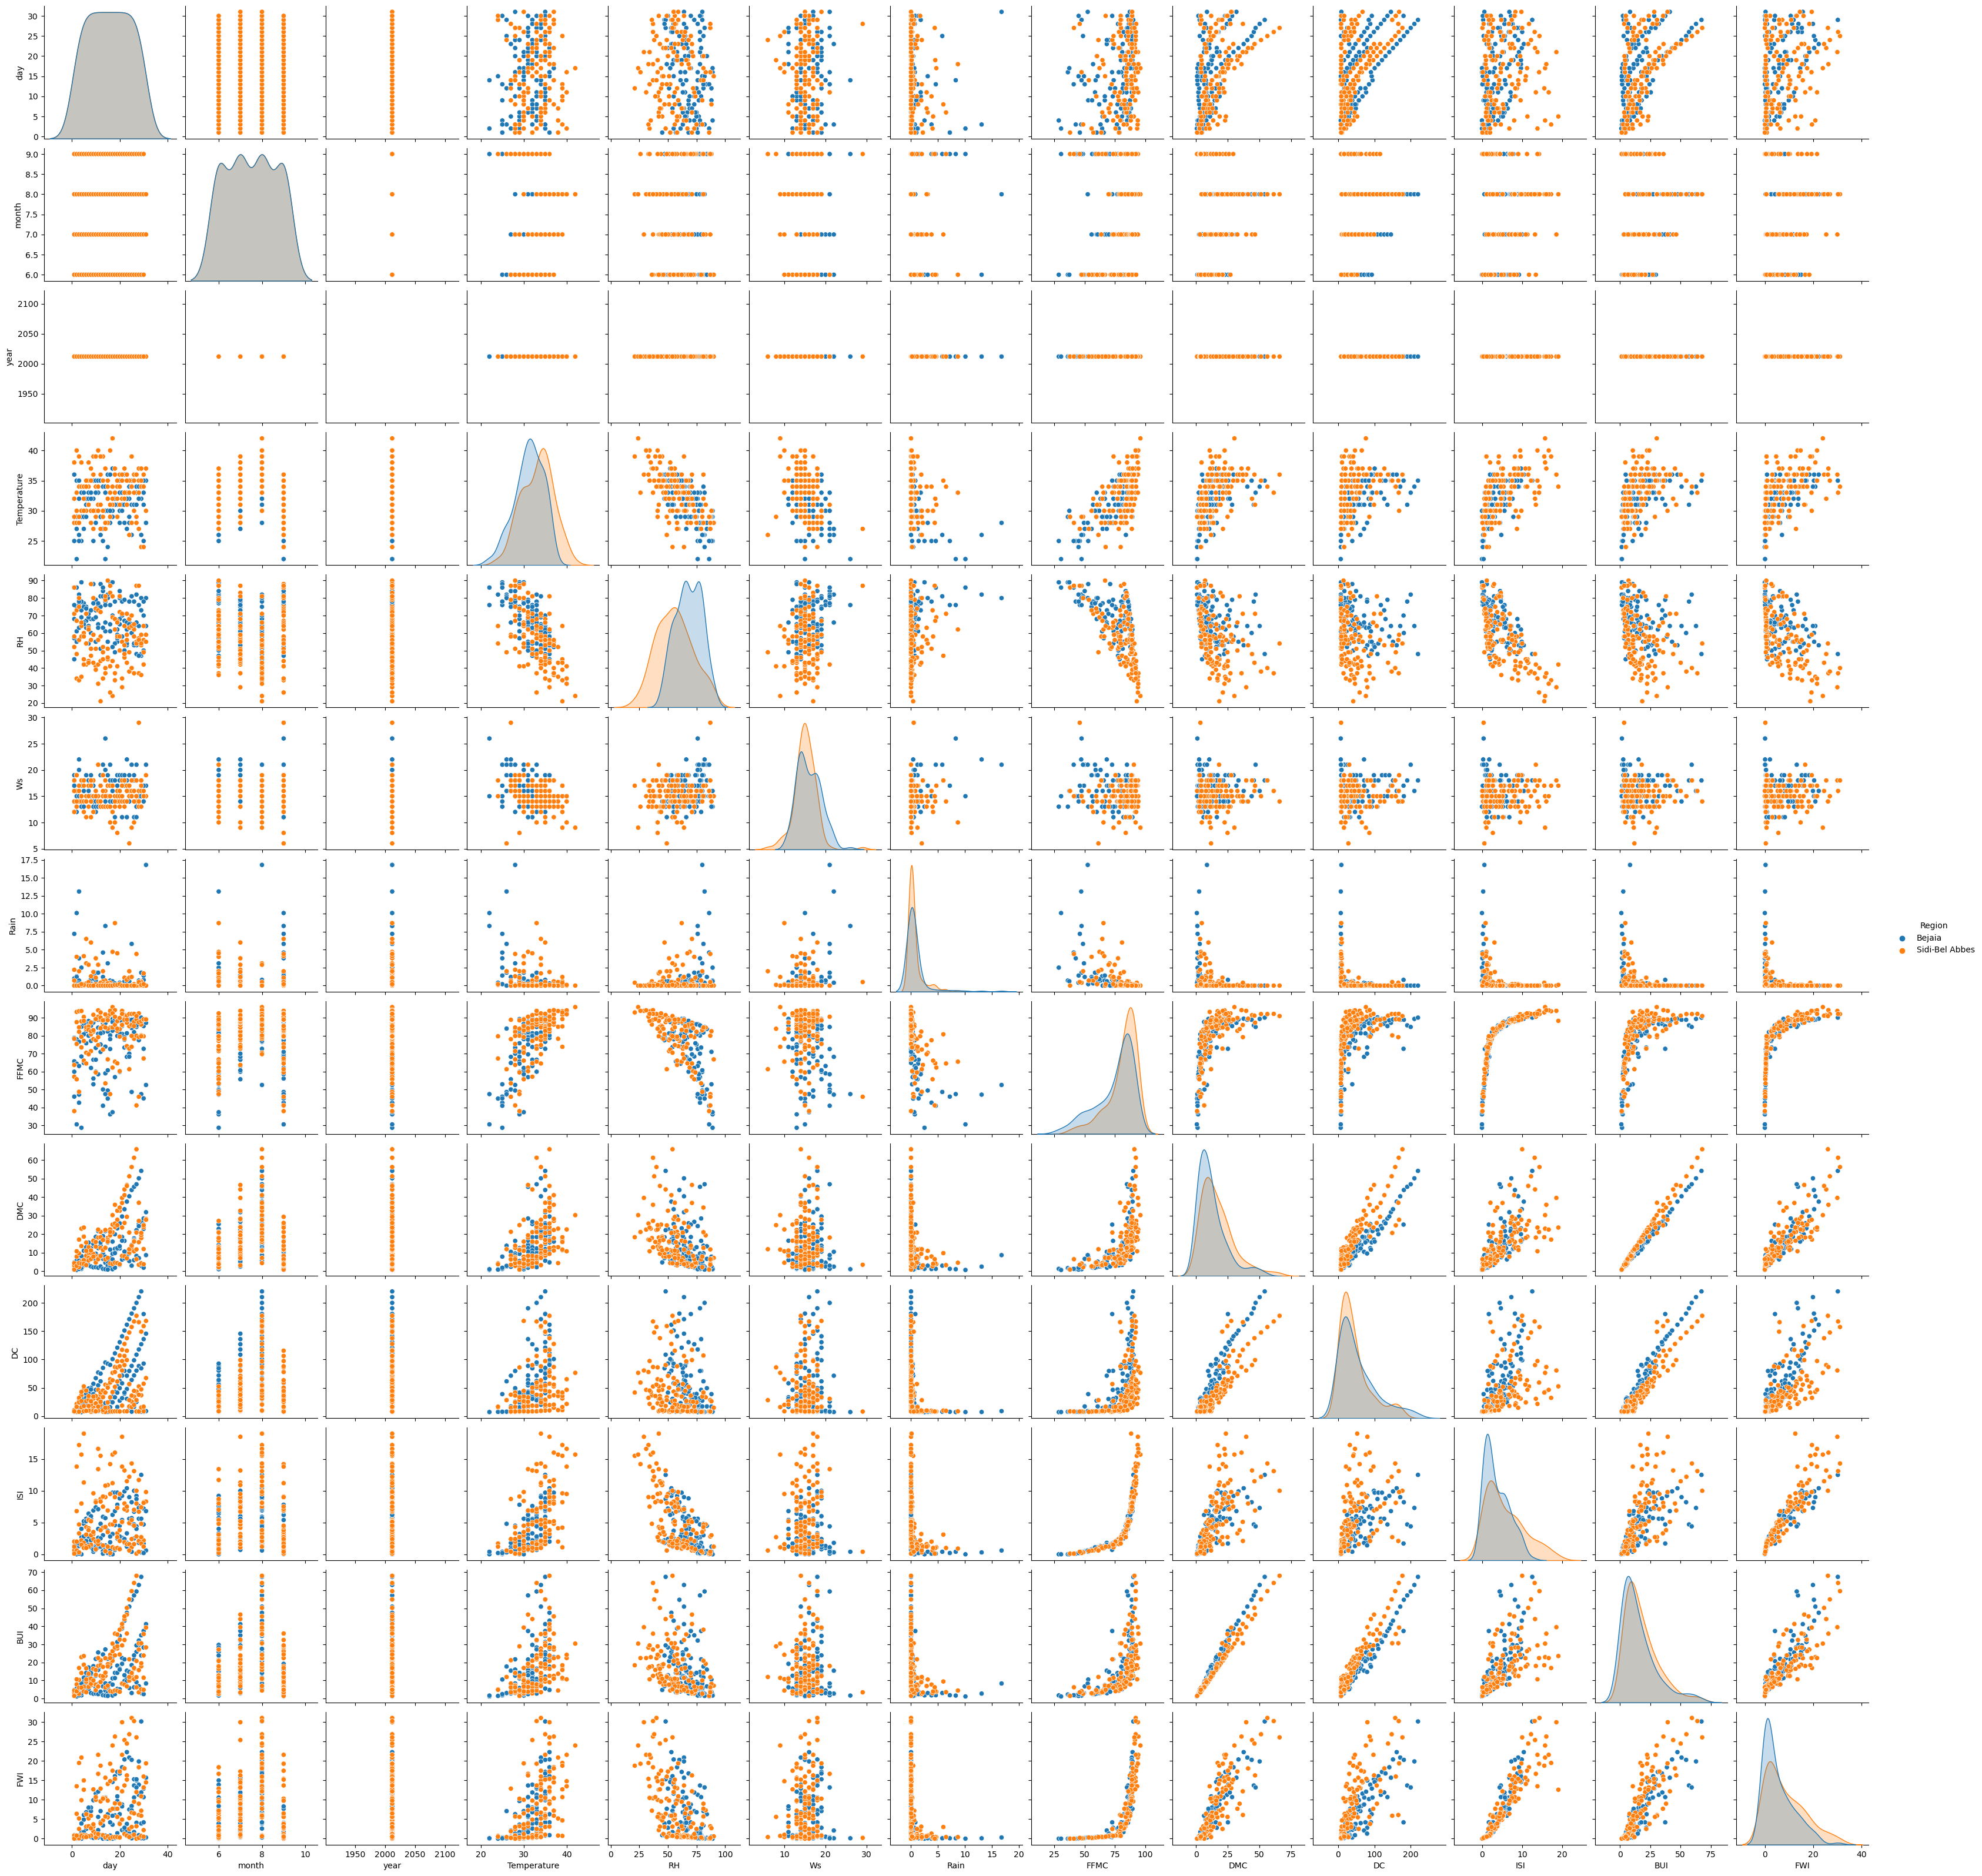

In [ ]:


# We have to temporarily drop the rows with 'NA' values # because the Seaborn plotting 
# function does not know what to do with them
sb.pairplot(algerian_forest_data, hue='Region')

In [ ]:
is_between = (algerian_forest_data['Temperature'] >= 22) & (algerian_forest_data['Temperature'] <= 42)

print(is_between)

0      True
1      True
2      True
3      True
4      True
       ... 
239    True
240    True
241    True
242    True
243    True
Name: Temperature, Length: 244, dtype: bool


<Axes: xlabel='Classes', ylabel='count'>

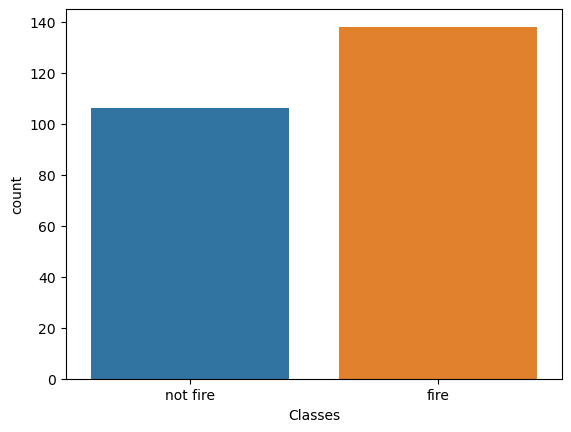

In [ ]:
sb.countplot(x=algerian_forest_data.Classes)

<Axes: xlabel='month', ylabel='count'>

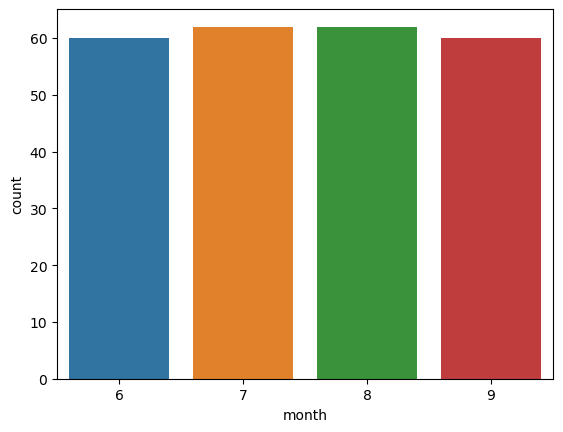

In [ ]:
sb.countplot(x=algerian_forest_data.month)

faz parte do tratamento de dados, organizar isto 

In [ ]:
algerian_forest_data = algerian_forest_data.Region.replace({'Bejaia': 1, 'Sidi-Bel Abbes': 0})

temperatura, umidade relativa, velocidade do vento, precipitação, índice de incêndio -------- notfire-fire



In [ ]:
import panda as pd
print(algerian_forest_data.columns)

NameError: name 'algerian_forest_data' is not defined

In [ ]:


#sb.boxplot(x=algerian_forest_data["day"], y=algerian_forest_data["not fire"], orient="h", showfliers=False, ax=ax[0])


'''fig, ax = plt.subplots(1, 2)
sb.boxplot(x=algerian_forest_data["Temperature"], y=algerian_forest_data["not fire"], orient="h", showfliers=False, ax=ax[0])
sb.boxplot(x=algerian_forest_data["RH"], y=algerian_forest_data["fire"], orient="h", showfliers=False, ax=ax[1])
sb.boxplot(x=algerian_forest_data["WS"], y=algerian_forest_data["fire"], orient="h", showfliers=False, ax=ax[1])
sb.boxplot(x=algerian_forest_data["FFMC"], y=algerian_forest_data["fire"], orient="h", showfliers=False, ax=ax[1])
sb.boxplot(x=algerian_forest_data["DMC"], y=algerian_forest_data["fire"], orient="h", showfliers=False, ax=ax[1])
sb.boxplot(x=algerian_forest_data["DC"], y=algerian_forest_data["fire"], orient="h", showfliers=False, ax=ax[1])
sb.boxplot(x=algerian_forest_data["ISI"], y=algerian_forest_data["fire"], orient="h", showfliers=False, ax=ax[1])

sb.boxplot(x=algerian_forest_data["BUI"], y=algerian_forest_data["fire"], orient="h", showfliers=False, ax=ax[1])

sb.boxplot(x=algerian_forest_data["FWI"], y=algerian_forest_data["fire"], orient="h", showfliers=False, ax=ax[1])


plt.subplots_adjust(wspace=0.8, right=1.5, hspace=1.5)
plt.show()'''



AttributeError: 'Series' object has no attribute 'columns'